In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('/content/gdrive/MyDrive/TFG/notebooks/')

In [4]:
from functions import *

Dependencies installed successfully.


In [5]:
import geopandas as gpd
leboiron = gpd.read_file('/content/gdrive/MyDrive/TFG/data/external/swissTLMboiron')
leboiron

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,MAT_BERGED,LARG_B_G,LARG_B_D,ZONE_RIVE_,ZONE_RIV_1,NAT_RIVE_G,NAT_RIVE_D,CLASSE_GE,SHAPE_Leng,geometry
0,{314640DC-12A0-4A01-9767-5A80BFF91EDC},2018-01-08,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2519418.86 1158596.067 665.897, ..."
1,{70D1B6C0-2FDD-413F-9BCC-B0C07DF2AC83},2018-01-16,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2520045.344 1158450.453 670.292,..."
2,{8DB59E73-967F-405D-A0E1-836E28DDDD57},2018-01-08,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2519444.198 1158810.427 665.399,..."
3,{1E0F48F0-E8A7-4833-B816-A0AF6093DFAB},2016-01-22,2009-02-13,2004,NaN,2020,6,Verbessert,swisstopo,2015,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2520612.266 1153557.781 623.184,..."
4,{4150AEB7-9493-45F8-AAC6-7C015849F043},2018-01-16,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2519541.168 1158340.587 665.897,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,{FD8EEEA4-6DAE-4E72-9ECE-2209325B0E8A},2021-02-16,2016-01-21,2015,6.0,2020,6,Verbessert,swisstopo,2020,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2522310.42 1150400.885 481.578, ..."
339,{83050AC6-141B-45E9-8964-6438DFE380BC},2020-12-10,2016-01-14,2015,6.0,2020,6,Verbessert,swisstopo,2020,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2525385.535 1150795.403 419.528,..."
340,{600DB604-04D0-421E-A827-59414FA0C948},2018-01-16,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2519380.194 1158398.08 666.401, ..."
341,{5D7799C7-9927-4720-A440-6C32605ECBD9},2016-01-14,2009-02-13,2004,NaN,2020,6,Verbessert,swisstopo,2015,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2525501.713 1153461.943 490.329,..."


### Project leboiron linestrings into points

<ipython-input-6-14912fe5d97b>:9: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if row.geometry.type == 'LineString':


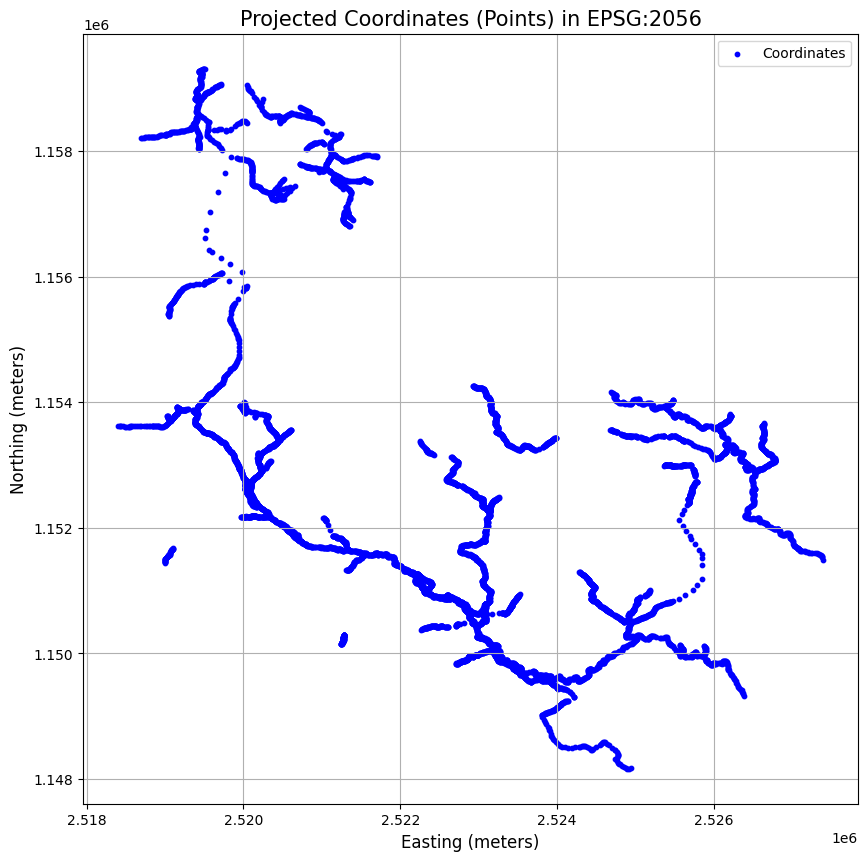

In [6]:
import matplotlib.pyplot as plt
# Initialize lists to store coordinates
x_coords = []
y_coords = []
z_coords = []

# Extract coordinates from LineStrings and store them as points
for i, row in leboiron.iterrows():
    if row.geometry.type == 'LineString':
        for x, y, z in row.geometry.coords:
            x_coords.append(x)
            y_coords.append(y)
            z_coords.append(z)

# Plot the points on a 2D grid
plt.figure(figsize=(10, 10))
plt.scatter(x_coords, y_coords, color='blue', s=10, label='Coordinates')

# Customize the plot
plt.title('Projected Coordinates (Points) in EPSG:2056', fontsize=15)
plt.xlabel('Easting (meters)', fontsize=12)
plt.ylabel('Northing (meters)', fontsize=12)

# Add gridlines
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

### Point interpolation with ground truth data

In [7]:
def distance_matrix(x0, y0, x1, y1):
    """
    Calculate distance matrix.
    Note: from <http://stackoverflow.com/questions/1871536>
    """

    obs = np.vstack((x0, y0)).T
    interp = np.vstack((x1, y1)).T

    d0 = np.subtract.outer(obs[:, 0], interp[:, 0])
    d1 = np.subtract.outer(obs[:, 1], interp[:, 1])

    # calculate hypotenuse
    return np.hypot(d0, d1)


def simple_idw(x, y, z, xi, yi, beta=2):
    """
    Simple inverse distance weighted (IDW) interpolation
    x`, `y`,`z` = known data arrays containing coordinates and data used for interpolation
    `xi`, `yi` =  two arrays of grid coordinates
    `beta` = determines the degree to which the nearer point(s) are preferred over more distant points.
            Typically 1 or 2 (inverse or inverse squared relationship)
    """

    dist = distance_matrix(x, y, xi, yi)

    # In IDW, weights are 1 / distance
    # weights = 1.0/(dist+1e-12)**power
    weights = dist ** (-beta)

    # Make weights sum to one
    weights /= weights.sum(axis=0)

    # Multiply the weights for each interpolated point by all observed Z-values
    return np.dot(weights.T, z)

In [8]:
import pandas as pd
projection_coordenates = pd.DataFrame(data={'Coord X': x_coords,'Coord Y': y_coords,'Altitude': z_coords})

In [10]:
import os
PATH_DATA = '/content/gdrive/MyDrive/TFG/data/external/'
air_stations_total_data = pd.read_csv(os.path.join(PATH_DATA, 'airtemp files/30MinFreq_air_boiron_and_swissmeteo_data.csv'),index_col=0)
air_stations_total_data

,ABOR1,ABOT1,ABOT2,ABOT3,ABOR2,ABOT4,PT15,BIE,CGI,CHB,MAH,PUY,VEV
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.866667,1.633333,NaN,0.066667,2.600000,NaN
2011-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.933333,1.766667,NaN,-0.066667,2.400000,NaN
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.900000,1.966667,NaN,-0.100000,2.333333,NaN
2011-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.966667,2.000000,NaN,-0.200000,2.300000,NaN
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.900000,2.000000,NaN,-0.300000,2.133333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.633333,21.566667,15.233333,20.433333,21.800000,23.100000
2023-07-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.266667,21.300000,15.100000,20.166667,22.366667,22.400000
2023-07-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.900000,21.366667,15.033333,19.233333,22.066667,22.233333


Filter data to obtain

In [11]:
start_date = '2011-01-01'
end_date = '2019-12-31'

In [12]:
air_stations_filt = air_stations_total_data.loc[start_date:end_date]
air_stations_filt.index = pd.to_datetime(air_stations_filt.index)
air_stations_monthly_mean = air_stations_filt.resample('M').mean()
air_stations_monthly_mean

<ipython-input-12-d6d4a4c7586b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  air_stations_monthly_mean = air_stations_filt.resample('M').mean()


,ABOR1,ABOT1,ABOT2,ABOT3,ABOR2,ABOT4,PT15,BIE,CGI,CHB,MAH,PUY,VEV
datetime,,,,,,,,,,,,,
2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.159521,2.439427,NaN,1.541599,2.980242,NaN
2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.263839,3.302257,NaN,1.803199,4.275893,NaN
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.445968,7.406250,NaN,6.071050,7.811358,NaN
2011-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.117685,13.465301,NaN,12.070833,14.017222,NaN
2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.538754,16.137970,NaN,14.724395,16.796573,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,NaN,16.755043,16.73462,18.467983,20.469141,18.595127,17.202218,18.402666,19.949619,15.286022,19.074619,20.499776,20.891756
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,14.251319,15.197986,16.842569,11.810625,15.768079,16.950509,17.407269
2019-10-31,NaN,NaN,NaN,NaN,NaN,NaN,11.158837,11.424149,12.670004,9.514583,11.532661,13.297245,13.887970


In [13]:
air_stations_total_metadata = pd.read_csv(os.path.join(PATH_DATA, 'airtemp files/air_boiron_and_swissmeteo_metadata.csv'),index_col=0)
air_stations_total_metadata

,Coord X,Coord Y,Altitude
Station,,,
ABOR1,2521077.0,1151629.0,504.6
ABOT1,2519862.0,1155534.0,666.0
ABOT2,2519923.0,1154643.0,663.9
ABOT3,2521123.0,1151684.0,515.2
ABOR2,2524102.0,1149509.0,412.9
ABOT4,2521123.0,1151684.0,515.4
PT15,2519857.0,1153198.0,592.9
AIG,2560404.0,1130713.0,381.0
BIE,2515887.0,1153210.0,683.0


In [14]:
import numpy as np
LR = 5.5
air_interpolated = pd.DataFrame(columns=projection_coordenates.index)

for ri,r in air_stations_monthly_mean.iterrows():
    temp = pd.concat([pd.DataFrame(r.values, index=r.index, columns=['temp',]), air_stations_total_metadata], axis=1)
    temp.dropna(inplace=True)

    temp['temp'] += LR * temp['Altitude'] / 1000

    if len(temp) == 0:
        a = np.empty(projection_coordenates.shape[0])
        a[:] = np.nan
        air_interpolated.loc[ri] = a
    else:
        x = temp['Coord X']
        y = temp['Coord Y']
        z = temp['temp']

        xi = projection_coordenates['Coord X']
        yi = projection_coordenates['Coord Y']

        temp_interpolated = simple_idw(x, y, z, xi, yi, beta=2)
        temp_interpolated -= LR * projection_coordenates['Altitude']  / 1000

        air_interpolated.loc[ri] = temp_interpolated

In [15]:
projection_coordenates

,Coord X,Coord Y,Altitude
0,2519418.860,1158596.067,665.897
1,2519413.425,1158599.908,665.852
2,2519406.543,1158605.972,665.852
3,2519401.953,1158611.903,665.852
4,2519395.307,1158626.403,665.852
...,...,...,...
8177,2521068.436,1158303.868,649.566
8178,2521123.362,1158274.452,649.506
8179,2521164.803,1158252.165,649.506
8180,2521203.627,1158231.275,649.506


In [16]:
air_interpolated.to_csv(os.path.join(PATH_DATA,'air_interpolated_leboiron.csv'), header=True)

### Show and save results

In [17]:
df = projection_coordenates.join(np.transpose(air_interpolated))

In [18]:
pip install rasterio

In [19]:
import rasterio
from rasterio.transform import from_origin

In [20]:
def load_raster(filepath,rgb = True):
  with rasterio.open(filepath) as src:
    if rgb:
      red = src.read(1)
      green = src.read(2)
      blue = src.read(3)
      rgb = np.dstack((red, green, blue))
      return rgb, src
    else:
      return src.read(1), src

In [21]:
def save_raster(raster_array,filepath,shp):
  with rasterio.open(
        filepath,
        'w',
        driver='GTiff',
        height=raster_array.shape[0],
        width=raster_array.shape[1],
        count=1,
        dtype=raster_array.dtype,
        crs=shp.crs.to_string(),  # Ensure correct CRS
        transform=transform,
        nodata=np.nan
) as dst:
    dst.write(raster_array, 1)

Create grid to visualize temperature in Le Boiron shp

In [22]:
folder_path = '/content/gdrive/MyDrive/TFG/data/raw/airtemp_interpolated'

# List all files in the folder and delete them
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
    except Exception as e:
        print(f"Error: {e}")


In [24]:
import numpy as np
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt

# Extract the coordinate columns (Coord X, Coord Y)
x_coords = df['Coord X'].values
y_coords = df['Coord Y'].values

# Define bounds and resolution for the grid
bounds = leboiron.total_bounds
resolution = 30
x_min, y_min, x_max, y_max = bounds
x_range = np.arange(x_min, x_max, resolution)
y_range = np.arange(y_min, y_max, resolution)

# Function to map coordinates to the grid (pre-compute grid indices)
def get_closest_grid_cell(x, y, x_range, y_range):
    x_idx = np.argmin(np.abs(x_range - x))
    y_idx = np.argmin(np.abs(y_range - y))
    return x_idx, y_idx

# Precompute the grid cell indices for all coordinates
grid_indices = [get_closest_grid_cell(x, y, x_range, y_range) for x, y in zip(x_coords, y_coords)]

# Define the transformation for the raster grid
transform = from_origin(x_min, y_max, resolution, resolution)

# Loop through each temperature column (each date)
for col in df.columns[3:]:  # Assuming temperature columns start from the 4th column onward
    temperature = df[col].values  # Extract the temperature data for the current date

    # Initialize an array to store temperature values for the current day
    raster_array = np.zeros((len(y_range), len(x_range)))

    # Assign temperature values to the grid cells based on precomputed indices
    for i, (x_idx, y_idx) in enumerate(grid_indices):
        temp = temperature[i]
        raster_array[y_idx, x_idx] = temp

    save_raster(np.flipud(raster_array),f'{folder_path}/airtemp_{col.strftime("%Y-%m")}.tif',leboiron)


    # Optional: Visualize the temperature grid for each day
    plt.imshow(raster_array, cmap='hot', origin='lower', extent=[x_min, x_max, y_min, y_max])
    plt.colorbar(label='Temperature')
    plt.title(f'Temperature Heatmap for {col}')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

### Water interpolation

#### Load data and filter

In [25]:
water_stations = pd.read_csv('/content/gdrive/MyDrive/TFG/data/external/watertemp files/water_boiron_2011_2023.csv')
water_stations

,Date et heure,BOI001,RTV021,BOI005,BOI006,BOI016,RTV045,BOI017,BOI008,BOI009,RTV008,BOI011,BOI012,BOI013,BOI021,BOI020,RTV028,BOI018,BOI019,BOI015
0,23.06.2011 08:00:00,NaN,16.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23.06.2011 08:15:00,NaN,16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.06.2011 08:30:00,NaN,17.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.06.2011 08:45:00,NaN,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23.06.2011 09:00:00,11.8,19.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423862,25.07.2023 14:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.3
423863,25.07.2023 14:44:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.3
423864,25.07.2023 14:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423865,25.07.2023 15:14:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
start_date = pd.to_datetime('01-03-2013', dayfirst=True)  # Define start date in the correct format
end_date = pd.to_datetime('25-07-2023', dayfirst=True)    # You can set end date as needed

In [27]:
# Asegúrate de que la columna de fechas esté en formato datetime
water_stations['Date et heure'] = pd.to_datetime(water_stations['Date et heure'],format='%d.%m.%Y %H:%M:%S', dayfirst=True)

# Establecer la columna 'Date et heure' como índice
water_stations.set_index('Date et heure', inplace=True)

# Filtrar por el rango de fechas deseado
water_stations_filt = water_stations.loc[start_date:end_date]

# Calcular la media mensual
water_stations_monthly_mean = water_stations_filt.resample('M').mean()


<ipython-input-27-2db2e4dbf739>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  water_stations_monthly_mean = water_stations_filt.resample('M').mean()


Load water stations metadata

In [28]:
water_stations_total_metadata = pd.read_csv('/content/gdrive/MyDrive/TFG/data/external/watertemp files/water_stations_with_Qratio.csv')
water_stations_total_metadata

,CODE_MdlR,CODE_RTV_2021,Coord X,Coord Y,Taux de recouvrement de la ripisylve (%),Altitude,WGS84_Latitude,WGS84_Longitude,ratio
0,RTV028,RTV_BOM_LEM_0388,2525323,1150240,100,388,46.499294,6.465835,0.808703
1,BOI020,RTV_BLA_BOM_0397,2524895,1150320,100,397,46.499966,6.460247,0.319376
2,BOI015,RTV_BOM_LEM_0372,2526344,1149431,100,372,46.492131,6.479263,1.000000
3,BOI019,RTV_BOM_LEM_0379,2526007,1149860,75,379,46.495952,6.474805,1.000000
4,BOI018,RTV_BOM_LEM_0383,2525635,1149957,80,383,46.496784,6.469945,0.808703
5,BOI021,RTV_BOM_LEM_0392,2525010,1150251,100,392,46.499358,6.461756,0.489327
6,BOI013,RTV_BOM_LEM_0406,2524447,1149734,100,406,46.494644,6.454508,0.489327
7,BOI012,RTV_BOM_LEM_0421,2523618,1149689,100,421,46.494145,6.443718,0.489327
8,BOI011,RTV_BOM_LEM_0440,2522970,1150411,90,440,46.500565,6.435158,0.540832
9,RTV008,RTV_BOM_LEM_0459,2522299,1151035,70,459,46.506101,6.426312,0.392029


#### Interpolation process

In [29]:
water_stations_total_metadata.index = water_stations_total_metadata['CODE_MdlR']
water_stations_total_metadata

,CODE_MdlR,CODE_RTV_2021,Coord X,Coord Y,Taux de recouvrement de la ripisylve (%),Altitude,WGS84_Latitude,WGS84_Longitude,ratio
CODE_MdlR,,,,,,,,,
RTV028,RTV028,RTV_BOM_LEM_0388,2525323,1150240,100,388,46.499294,6.465835,0.808703
BOI020,BOI020,RTV_BLA_BOM_0397,2524895,1150320,100,397,46.499966,6.460247,0.319376
BOI015,BOI015,RTV_BOM_LEM_0372,2526344,1149431,100,372,46.492131,6.479263,1.000000
BOI019,BOI019,RTV_BOM_LEM_0379,2526007,1149860,75,379,46.495952,6.474805,1.000000
BOI018,BOI018,RTV_BOM_LEM_0383,2525635,1149957,80,383,46.496784,6.469945,0.808703
BOI021,BOI021,RTV_BOM_LEM_0392,2525010,1150251,100,392,46.499358,6.461756,0.489327
BOI013,BOI013,RTV_BOM_LEM_0406,2524447,1149734,100,406,46.494644,6.454508,0.489327
BOI012,BOI012,RTV_BOM_LEM_0421,2523618,1149689,100,421,46.494145,6.443718,0.489327
BOI011,BOI011,RTV_BOM_LEM_0440,2522970,1150411,90,440,46.500565,6.435158,0.540832


In [30]:
import numpy as np
LR = 5.5
water_interpolated = pd.DataFrame(columns=projection_coordenates.index)

for ri,r in water_stations_monthly_mean.iterrows():
    temp = pd.concat([pd.DataFrame(r.values, index=r.index, columns=['temp',]),water_stations_total_metadata], axis=1)
    temp.dropna(inplace=True)

    temp['temp'] += LR * temp['Altitude'] / 1000
    if len(temp) == 0:
        a = np.empty(projection_coordenates.shape[0])
        a[:] = np.nan
        water_interpolated.loc[ri] = a
    else:
        x = temp['Coord X']
        y = temp['Coord Y']
        z = temp['temp']

        xi = projection_coordenates['Coord X']
        yi = projection_coordenates['Coord Y']

        temp_interpolated = simple_idw(x, y, z, xi, yi, beta=2)
        temp_interpolated -= LR * projection_coordenates['Altitude']  / 1000

        water_interpolated.loc[ri] = temp_interpolated
        print(temp_interpolated)

0       5.087934
1       5.087760
2       5.087105
3       5.086480
4       5.084987
          ...   
8177    5.151036
8178    5.149707
8179    5.148312
8180    5.146888
8181    5.146200
Name: Altitude, Length: 8182, dtype: float64
0       7.239049
1       7.239244
2       7.239159
3       7.239075
4       7.238868
          ...   
8177    7.322918
8178    7.322946
8179    7.322700
8180    7.322453
8181    7.322347
Name: Altitude, Length: 8182, dtype: float64
0       8.634759
1       8.634841
2       8.634598
3       8.634384
4       8.633908
          ...   
8177    8.729153
8178    8.729389
8179    8.729278
8180    8.729140
8181    8.729024
Name: Altitude, Length: 8182, dtype: float64
0       10.196460
1       10.196712
2       10.196735
3       10.196777
4       10.196922
          ...    
8177    10.305253
8178    10.306325
8179    10.306908
8180    10.307472
8181    10.307677
Name: Altitude, Length: 8182, dtype: float64
0       12.488149
1       12.488730
2       12.489268
3      

In [31]:
water_interpolated.to_csv('/content/gdrive/MyDrive/TFG/data/external/water_interpolated_leboiron.csv')

In [32]:
df = projection_coordenates.join(np.transpose(water_interpolated))

#### Show and save results

In [33]:
folder_path = '/content/gdrive/MyDrive/TFG/data/raw/wt_interpolated'

# List all files in the folder and delete them
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
    except Exception as e:
        print(f"Error: {e}")


In [34]:
import numpy as np
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt

# Extract the coordinate columns (Coord X, Coord Y)
x_coords = df['Coord X'].values
y_coords = df['Coord Y'].values

# Define bounds and resolution for the grid
bounds = leboiron.total_bounds
resolution = 30
x_min, y_min, x_max, y_max = bounds
x_range = np.arange(x_min, x_max, resolution)
y_range = np.arange(y_min, y_max, resolution)

# Function to map coordinates to the grid (pre-compute grid indices)
def get_closest_grid_cell(x, y, x_range, y_range):
    x_idx = np.argmin(np.abs(x_range - x))
    y_idx = np.argmin(np.abs(y_range - y))
    return x_idx, y_idx

# Precompute the grid cell indices for all coordinates
grid_indices = [get_closest_grid_cell(x, y, x_range, y_range) for x, y in zip(x_coords, y_coords)]

# Define the transformation for the raster grid
transform = from_origin(x_min, y_max, resolution, resolution)

# Loop through each temperature column (each date)
for col in df.columns[3:]:  # Assuming temperature columns start from the 4th column onward
    temperature = df[col].values  # Extract the temperature data for the current date

    # Initialize an array to store temperature values for the current day
    raster_array = np.zeros((len(y_range), len(x_range)))

    # Assign temperature values to the grid cells based on precomputed indices
    for i, (x_idx, y_idx) in enumerate(grid_indices):
        temp = temperature[i]
        raster_array[y_idx, x_idx] = temp

    save_raster(np.flipud(raster_array),f'{folder_path}/watertemp_{col.strftime("%Y-%m")}.tif',leboiron)


    # Optional: Visualize the temperature grid for each day
    plt.imshow(raster_array, cmap='hot', origin='lower', extent=[x_min, x_max, y_min, y_max])
    plt.colorbar(label='Temperature')
    plt.title(f'Temperature Heatmap for {col}')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.